In [27]:
from solartwins import *
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

In [28]:
C = [0.0115, -0.0836, 0.0394]
CH = [0.0115, -0.0940, 0.0293]
O= [0.0088, -0.0260, 0.0238]
Na= [0.0086, -0.0614, 0.0273]
Mg = [0.0099, -0.0367, 0.0121]
Al = [0.0139, -0.0595, 0.0156]
Si = [0.0063, -0.0308, 0.0110]
S = [0.0098, -0.0537, 0.0240]
Ca = [-0.0011, 0.0217, 0.0089]
Sc = [0.0059, -0.0263, 0.0159]
ScII = [0.0059, -0.0235, 0.0205]
Ti = [0.0036, -0.0024, 0.0119]
TiII = [0.0036, -0.0094, 0.0115]
V = [0.0013, -0.0023, 0.0091]
Cr = [-0.0016, 0.0095, 0.0053]
CrII = [-0.0016, 0.0133, 0.0000]
Mn = [0.0023, -0.0312, 0.0206]
Co = [0.0074,-0.0460,0.0178 ]
Ni = [0.0071,-0.0505,0.0172 ]
Cu = [0.0149,-0.0850,0.0244 ]
Zn = [0.0102,-0.0699,0.0224 ]
Sr = [-0.0251,0.1310,0.0574 ]
Y = [-0.0238,0.1135,0.0470 ]
Zr = [-0.0219,0.1179,0.0422 ]
Ba = [-0.0317,0.1897,0.0309 ]
La = [-0.0227,0.1397,0.0350 ]
Ce = [-0.0220,0.1497,0.0305 ]
Pr = [-0.0103,0.1534,0.0451 ]
Nd = [-0.0198,0.1527,0.0360 ]
Sm = [-0.0077,0.0668,0.0226 ]
Eu = [-0.0056,0.0908,0.0300 ]
Gd = [-0.0060,0.0592,0.0279 ]
Dy = [-0.0073,0.0805,0.0332 ]

bedelements_names = ['C', 'CH', 'O', 'Na', 'Mg', 'Al', 'Si', 'S', 'Ca', 'Sc', 'ScII', 'Ti', 'TiII', 'V', 
    'Cr', 'CrII', 'Mn', 'Co', 'Ni', 'Cu', 'Zn', 'Sr', 'Y', 'Zr', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Dy']

bedelements = [C, CH, O, Na, Mg, Al, Si, S, Ca, Sc, ScII, Ti, TiII, V, Cr, CrII, Mn, Co, Ni, Cu, Zn, Sr, Y, Zr, Ba, 
               La, Ce, Pr, Nd, Sm, Eu, Gd, Dy]

m = []
b = []
s = []
for h, val in enumerate(bedelements): 
    m.append(val[0])
    b.append(val[1])
    s.append(val[2])

Table([bedelements_names,m,b,s], names = ('element','m', 'b', 's'))

element,m,b,s
str4,float64,float64,float64
C,0.0115,-0.0836,0.0394
CH,0.0115,-0.094,0.0293
O,0.0088,-0.026,0.0238
Na,0.0086,-0.0614,0.0273
Mg,0.0099,-0.0367,0.0121
Al,0.0139,-0.0595,0.0156
Si,0.0063,-0.0308,0.011
S,0.0098,-0.0537,0.024
Ca,-0.0011,0.0217,0.0089


In [29]:
elements =[]
for n in t.columns[3:64]:
    if len(n) < 3 :
        elements.append(n)

In [30]:
bed_compare_m = []
bed_compare_b = []
bed_compare_s = []
elem_compare_m = []
elem_compare_b = []
elem_compare_s = []

x0 = (.01, .05, -.003) 
element_name = []
one_d_jitter = []   

for y in elements: 
    for num, g in enumerate(bedelements_names):
        if y == g:
            som = scipy.optimize.minimize(nlnL, x0, args = (t['age'], t[y], t[y + '_err']))
            mb2d = som['x']
            element_name.append(y)
            bed_compare_m.append(bedelements[num][0])
            elem_compare_m.append(mb2d[0])
            bed_compare_b.append(bedelements[num][1])
            elem_compare_b.append(mb2d[1])
            bed_compare_s.append(np.absolute(bedelements[num][2]))
            elem_compare_s.append(np.absolute(mb2d[2]))

In [31]:
Table([element_name, bed_compare_m, elem_compare_m, bed_compare_b, elem_compare_b,
       bed_compare_s, np.absolute(elem_compare_s), np.array(bed_compare_s)/np.array(elem_compare_s)], 
      names =('Element', 'Bedell m', 'My m', 'Bedell b', 'My b', 'Bedell s', 'My s', 'Divided'))

Element,Bedell m,My m,Bedell b,My b,Bedell s,My s,Divided
str2,float64,float64,float64,float64,float64,float64,float64
O,0.0088,0.008744486979818137,-0.026,-0.025663614321941867,0.0238,0.024338335439691727,0.9778811726452833
Na,0.0086,0.008556040924295339,-0.0614,-0.06144395711340817,0.0273,0.027420692220153208,0.9955984984192155
Mg,0.0099,0.009844965027827201,-0.0367,-0.03665832907192759,0.0121,0.0123544939668085,0.9794006968239879
Al,0.0139,0.013780548411266719,-0.0595,-0.059172672396973325,0.0156,0.016672936158047394,0.9356480377615115
Si,0.0063,0.006316327714978617,-0.0308,-0.03079726625267884,0.011,0.011349963561334475,0.9691661070589968
S,0.0098,0.009692390352884753,-0.0537,-0.05313696619513268,0.024,0.02477620154001571,0.9686714874851952
Ca,-0.0011,-0.0010599513550552182,0.0217,0.021593765907097773,0.0089,0.008918255186794972,0.9979530539984994
V,0.0013,0.00132185709221802,-0.0023,-0.0023065279133777147,0.0091,0.009216951282205586,0.9873112834575383
Mn,0.0023,0.0022893764274826618,-0.0312,-0.03119916457429445,0.0206,0.02069658175159047,0.9953334442977257


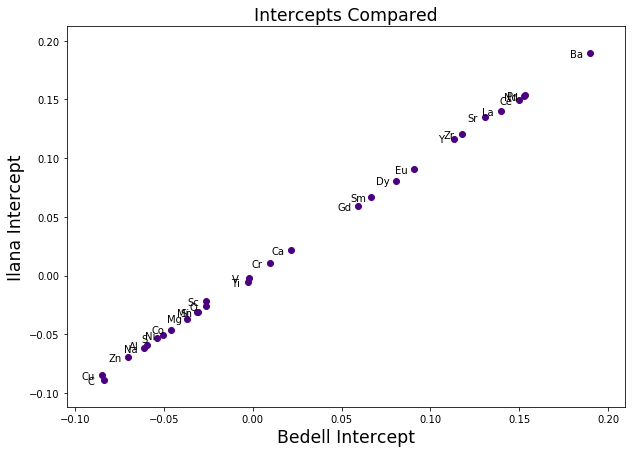

In [32]:
plt.scatter(bed_compare_b, elem_compare_b, c='indigo')
plt.xlabel('Bedell Intercept',fontsize='xx-large', family='sans-serif')
plt.ylabel('Ilana Intercept', fontsize='xx-large', family='sans-serif')
plt.title('Intercepts Compared', fontsize= 'xx-large', family='sans-serif')

for i, txt in enumerate(element_name):
    plt.annotate(txt, xy=(bed_compare_b[i], elem_compare_b[i]), xytext=(-13,-6), textcoords='offset points', 
                 ha='center', va='bottom')

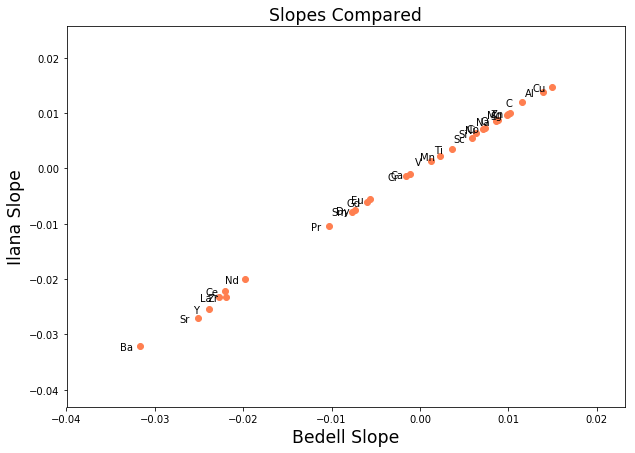

In [33]:
plt.scatter(bed_compare_m, elem_compare_m, c='coral')
plt.xlabel('Bedell Slope',fontsize='xx-large', family='sans-serif')
plt.ylabel('Ilana Slope', fontsize='xx-large', family='sans-serif')
plt.title('Slopes Compared', fontsize= 'xx-large', family='sans-serif')

for i, txt in enumerate(element_name):
    plt.annotate(txt, xy=(bed_compare_m[i], elem_compare_m[i]), xytext=(-13,-6), textcoords='offset points', 
                 ha='center', va='bottom')

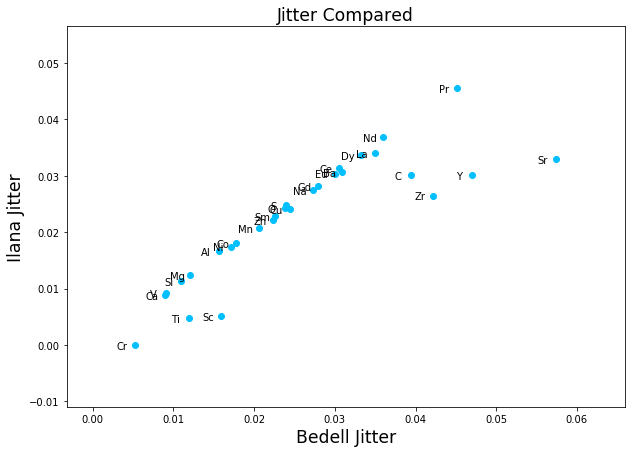

In [34]:
plt.scatter(bed_compare_s, elem_compare_s, c='deepskyblue')
plt.xlabel('Bedell Jitter',fontsize='xx-large', family='sans-serif')
plt.ylabel('Ilana Jitter', fontsize='xx-large', family='sans-serif')
plt.title('Jitter Compared', fontsize= 'xx-large', family='sans-serif')

for i, txt in enumerate(element_name):
    plt.annotate(txt, xy=(bed_compare_s[i], elem_compare_s[i]), xytext=(-13,-6), textcoords='offset points', 
                 ha='center', va='bottom')